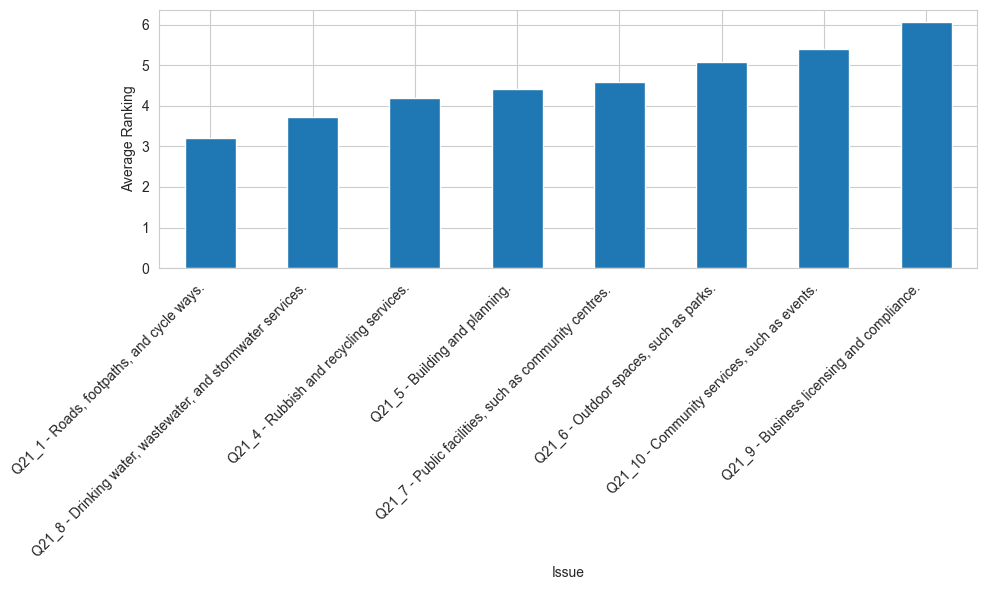

In [7]:
from matplotlib import pyplot as plt
from enum import Enum
import plotly.express as px
import pandas as pd

class Scale(Enum):
    LIKELY = ['Very unlikely ',
        'Unlikely ',
        'Neutral ',
        'Likely ',
        'Very likely ']
    IMPORTANT = ['Not at all important',
        'Not important',
        'Neutral',
        'Important',
        'Very important']
    SKILL = ['Very low',
        'Low',
        'Somewhat low',
        'Neutral',
        'Somewhat high',
        'High',
        'Very high']

class Colours(Enum):
    FIVE = ["#FF0000", "#FF7F7F", "#7F7F7F", "#7F7FFF", "#0000FF"]
    SEVEN = ["#FF0000", "#FF5555", "#FFAAAA", "#7F7F7F", "#AAAAFF", "#5555FF", "#0000FF"]

def stack_counts(df, columns, scale):
    df_subset = df[columns]

    # Turn long data into wide
    counts_df = pd.melt(df_subset, var_name='question', value_name='response')

    # Count the occurrences of each category for each question
    counts_df = pd.crosstab(counts_df['question'], counts_df['response'], dropna=False)

    # Reorder columns
    counts_df = counts_df[scale.value]

    # Calc percent
    counts_df = counts_df.div(counts_df.sum(axis=1), axis=0)

    return counts_df

def stacked_bars(df, columns, scale):
    counts_df = stack_counts(df, columns, scale)

    if len(scale.value) == 5:
        colours = Colours.FIVE.value
    elif len(scale.value) == 7:
        colours = Colours.SEVEN.value

    # Create figure
    fig = px.bar(counts_df, x=scale.value, color_discrete_sequence=colours)
    fig.update_xaxes(tickformat=",.2%")
    fig.show()

def ranking_counts(df, columns):
    df = df[columns]
    # Create a DataFrame to store counts of ranking positions
    rankings = pd.DataFrame(index=df.columns, columns=range(1, len(columns)))

    # Count how many times each ranking value occurs for each issue
    for col in df.columns:
        rankings.loc[col] = [df[col].tolist().count(i) for i in range(1, len(columns))]

    return rankings

def grouped_bars(df, columns):
    rankings = ranking_counts(df, columns)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create grouped bar plot (issues grouped together on x-axis)
    rankings.plot(kind='bar', ax=ax, width=0.8)

    # Adding labels and title
    ax.set_ylabel('Count of Rankings')
    ax.set_xlabel('Issues')

    # Rotate x-axis labels for clarity
    ax.set_xticklabels(rankings.index, rotation=45, ha='right')

    # Adding legend
    ax.legend(title='Most important to least important', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

def average_bars(df, columns):
    df = df[columns]

    # Calculate the average ranking for each category (mean of each column)
    average_rankings = df.mean()

    # Sort the rankings for better visualization
    average_rankings_sorted = average_rankings.sort_values()

    # Plotting
    plt.figure(figsize=(10, 6))
    average_rankings_sorted.plot(kind='bar')

    # Customize the chart
    plt.xlabel('Issue')
    plt.ylabel('Average Ranking')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

# df = pd.read_csv('data/all-responses.csv')
# stacked_bars(df, ['Q7 - Technology should be accessible and help people feel included, safe, and co...', 'Q11 - Technology should drive business growth and education opportunities, creati...'], Scale.IMPORTANT)
# grouped_bars(df, ['Q21_1 - Roads, footpaths, and cycle ways. ', 'Q21_4 - Rubbish and recycling services. '])
# average_bars(df, ['Q21_1 - Roads, footpaths, and cycle ways. ',
#        'Q21_4 - Rubbish and recycling services. ',
#        'Q21_5 - Building and planning. ',
#        'Q21_6 - Outdoor spaces, such as parks. ',
#        'Q21_7 - Public facilities, such as community centres.  ',
#        'Q21_8 - Drinking water, wastewater, and stormwater services. ',
#        'Q21_9 - Business licensing and compliance. ',
#        'Q21_10 - Community services, such as events. '])